# Week 6: Networks


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we are going to study how characters in the Marvel universe relate to each other using networks. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore the partnership network of the Marvel dataset

[**Feedback**](https://ulfaslak.com/vent)

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.

1. Highway system: Nodes are intersections and links are the roads
2. Rappers featuring each other: Nodes would be the artists, links would be the song



> **Ex. 6.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

1. I'm most interested in networks involving music and media. For example, the network in #2. It's probably very large, but it could be mapped out. I find it interesting.



> **Ex. 6.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

1. Use of networks to map the behavior of autonomous vehicles

> **Ex. 6.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

1. Network of relationships among a small company or among a family tree

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [39]:
import networkx as nx
G = nx.Graph()

In [40]:
G.add_node(1)
G.add_nodes_from([2,3])

In [41]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [42]:
G.add_node(H)

In [43]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])

In [44]:
G.add_edges_from(H.edges)

In [45]:
list(G.nodes)

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph at 0x1190e9898>]

In [46]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 0),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

In [47]:
G.remove_node(2)

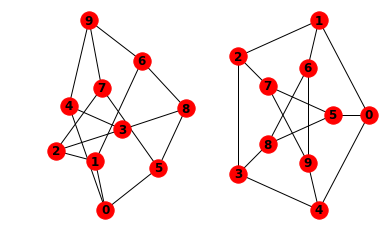

In [48]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

> **Ex. 6.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe how to create an ER network.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

In [49]:
tmp = nx.erdos_renyi_graph(100,.1)


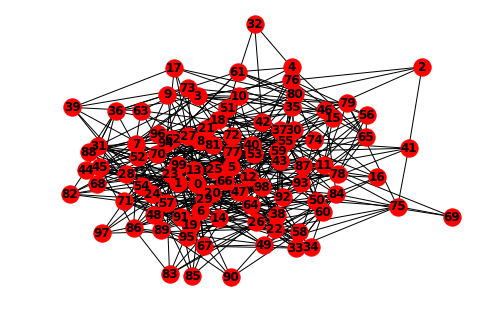

In [50]:
nx.draw(tmp, with_labels=True, font_weight='bold')

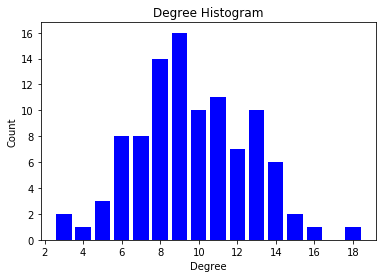

In [51]:
import collections

degree_sequence = sorted([d for n, d in tmp.degree()], reverse=True)  
# degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

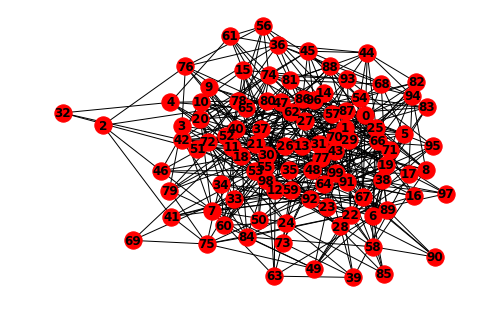

In [52]:
ba = nx.barabasi_albert_graph(100,2)
nx.draw(tmp, with_labels=True, font_weight='bold')

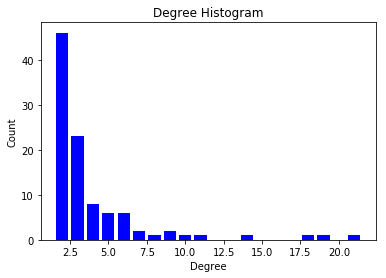

In [53]:
degree_sequence = sorted([d for n, d in ba.degree()], reverse=True)  
# degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

### Part 2: Marvel character partners

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze our Marvel dataset. The aim of the following exercises is to analyze the network *partnerships* between characters.

> **Ex. 6.2.1**: Write a function called `get_partners` that takes a character name, and extracts a list of their partners. Print the partnerships of Iron Man. They should be `['War Machine', 'Pepper Potts', 'Riri Williams']`.

>*Hint: Partnerships for a character are listed in the same way that alliances are. You can probably save yourself some time by looking at your solution to Ex. 4.1.1. Especially if you made use of regular expressions.*

In [54]:
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("./data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]


> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [55]:
part = nx.Graph()
iron = get_partners("Iron Man")
part.add_node("Iron Man")
for p in iron:
    part.add_node(p)
    part.add_edge("Iron Man", p)

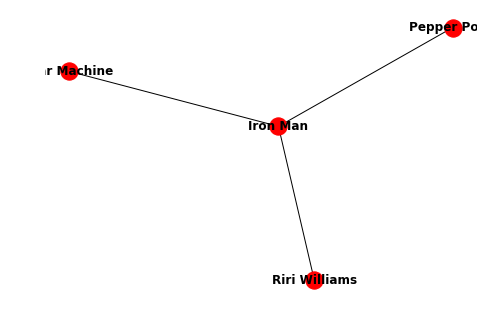

In [56]:
nx.draw(part, with_labels=True, font_weight='bold')

In [57]:
def add_partners(charac, graph):
    current_partners = get_partners(charac)
    graph.add_node(charac)
    for p in current_partners:
        graph.add_node(p)
        graph.add_edge(charac, p)
    return graph

In [58]:
def get_chars():
    chars = []
    for faction in ["heroes","villains", "ambiguous"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    return chars

In [59]:
the_chars = get_chars()

In [60]:
def return_graph(chars):
    tmp = nx.Graph()
    for c in chars:
        add_partners(c,tmp)
    return tmp

final = return_graph(the_chars)

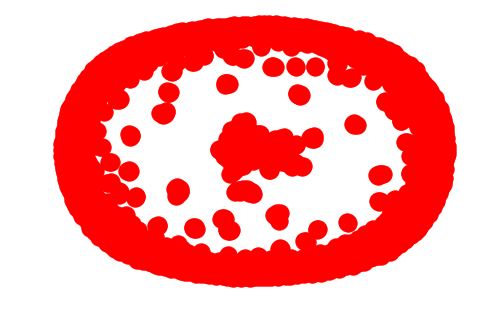

In [61]:
nx.draw(final)

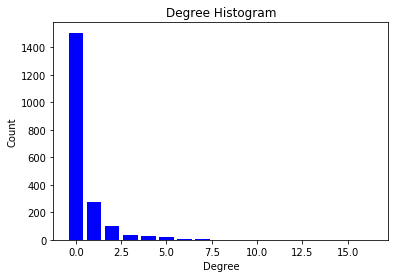

In [62]:
degree_sequence = sorted([d for n, d in final.degree()], reverse=True)  
# degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

Barabasi

In [ ]:
def add_partners(charac, graph):
    current_partners = get_partners(charac)
    graph.add_node(charac)
    for p in current_partners:
        graph.add_node(p)
        graph.add_edge(charac, p)
    return graph

In [64]:
def get_heroes():
    chars = []
    for faction in ["heroes"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    return chars

def get_vil():
    chars = []
    for faction in ["villains"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    return chars

def get_amb():
    chars = []
    for faction in ["ambiguous"]:
        faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
        for char in faction_chars:
            if char not in chars:
                chars.append(char)
    return chars

her = get_heroes()
vil = get_vil()
amb = get_amb()

In [66]:
hero_graph = return_graph(her)
villain_graph = return_graph(vil)
amb_graph = return_graph(amb)

In [67]:
def return_10(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    return degree_sequence[:10]


In [70]:
top_hero = return_10(hero_graph)
top_vil = return_10(villain_graph)
top_amb = return_10(amb_graph)

> **Ex: 6.2.4**: Create a bar chart (similar in style to the one in Ex. 3.2.1) with the 10 most high-degree characters in each class. Make sure that each subfigure has the same y-axis (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`).

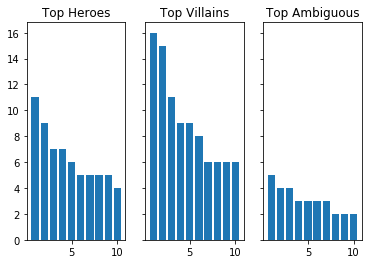

In [85]:
num = [1,2,3,4,5,6,7,8,9,10]
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
ax1.bar(num, top_hero)
ax1.set_title("Top Heroes")

ax2.bar(num, top_vil)
ax2.set_title("Top Villains")

ax3.bar(num, top_amb)
ax3.set_title("Top Ambiguous")
plt.show()

> **Ex: 6.2.5**: Create a bar chart (similar in style to the one in Ex. 3.2.1) for each class with the characters that has the highest [betweenness centrality](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) (BC). Again, make sure the y-axes are shared. When you comment on the result:
* Explain briefly what the BC measures (and why it takes a short while to compute it). An intuitive explanation is also great!
* Interpret, if you can, what the differences you see between the distribution of degree and BC means for the different classes.

> **Ex: 6.2.6**: Create yet another similar bar chart where instead you measure the [local clustering coefficient](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) (CC).
* Explain briefly what the CC measures, and what it intuitively means that a node is highly clustered (CC=1) or not clustered at all (CC=0).
* Interpret the difference between classes.

> **Extra: Ex: 6.2**: There seems to be some correlation between BC, degree and clustering, but it definitely doesn't look perfect. Try to make a scatter plot of characters' degree vs. their BC. If time permits, pimp your plot by:
* Prettifying your plot by:
    * Setting appropriate axis limits and labels
    * Fontsizes, figure title, etc.
    * Adding a slight amount of *jitter* to the degree
* Coloring nodes by class (hero: blue, villain: red, ambiguous: yellow)
* Scaling node sizes by the CC (add an offset so no nodes have size 0).

> Highlight your findings:
* Which characters have an unusually high centrality compared to their degree and vice versa? How can you explain this?
* Does this inspire you to think about new things that can be investigated?

> **Ex: 6.2.7**: We want to plot the network so we can visually get a feeling for how characters are connected. However, the network is too big to plot without some kind of pre-processing. Therefore, we remove all links between nodes that are not on the top 10 list of high-degree characters within their class.
* Color the nodes by class. Try if you can to use blue for heroes, red for villains and yellow for ambiguous.
* Scale the size of nodes by the square root of their degree.
* Adjust the layout of the figure so it doesn't look too messy (e.g. edge line width, node line width, type of force-layout [I can recommend *neato*, but you have to install graphviz with conda to use it])
* Do you see anything interesting? Get any new ideas for things that can be investigated?

> *Hint: I actually made [a tool](https://ulfaslak.com/works/network_styling_with_d3/index.html) for making pretty visualizations of networks. I'd be curious to see the Marvel network visualized in my tool. You can also launch networks into it directly from Python using the `netwulf` package (you can install it with pip). Just follow [this example](https://github.com/benmaier/netwulf).*